# RetrievalQA chain

In [1]:
import os
import openai
import sys
from IPython.display import Image

os.environ['OPENAI_API_KEY'] = "Replace with your API Key"
openai.api_key  = os.environ['OPENAI_API_KEY']

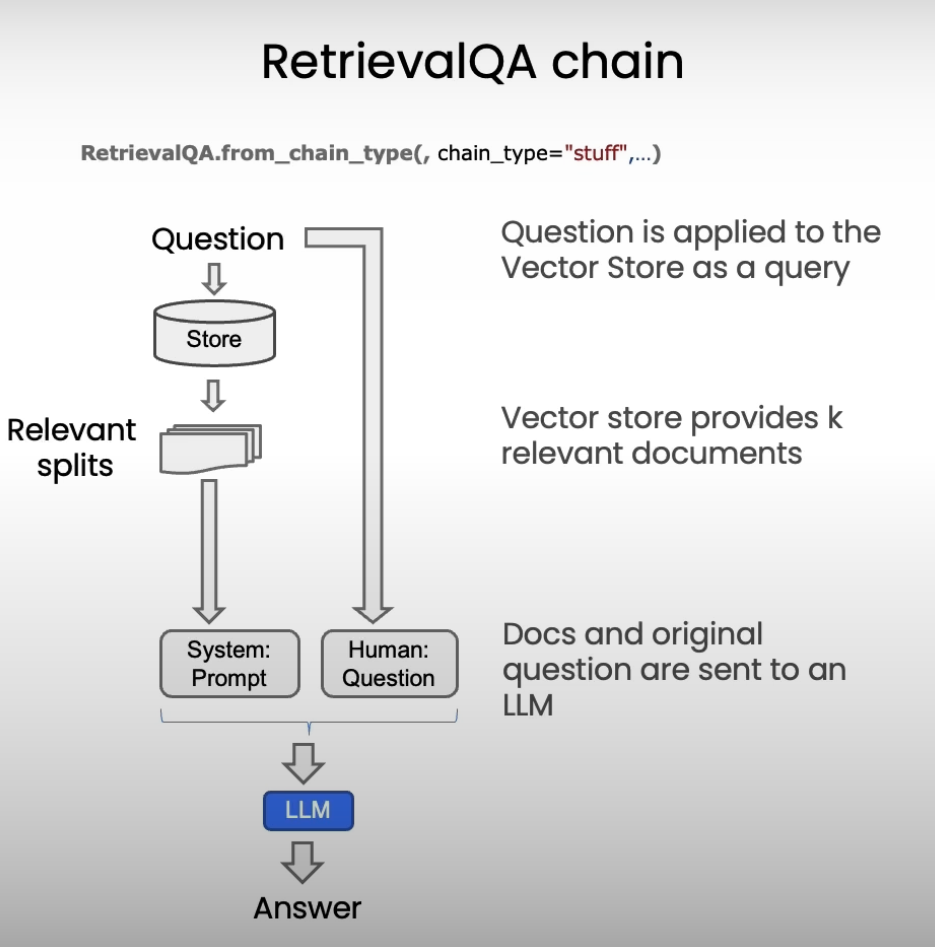

In [34]:
Image("../images/RetrievalQA chain.png")

Additional methods for different use cases

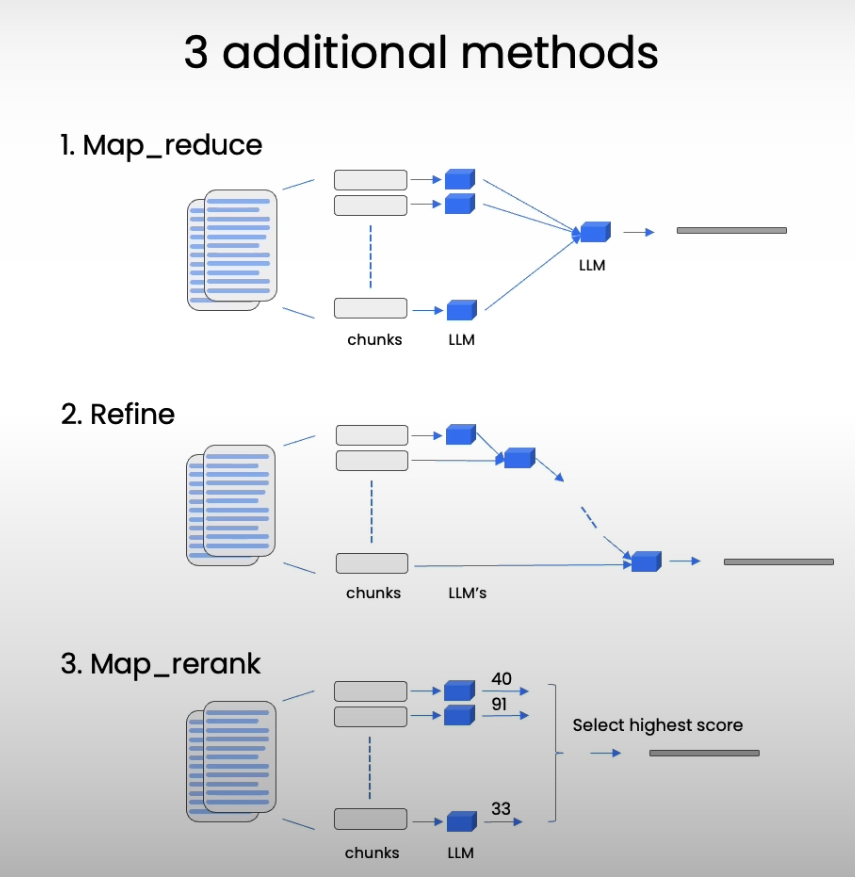

In [35]:
Image("../images/addtional QA methods.png")

The code below was added to assign the openai LLM version filmed until it is deprecated, currently in Sept 2023. 
LLM responses can often vary, but the responses may be significantly different when using a different model version.

In [2]:
import datetime
current_date = datetime.datetime.now().date()
if current_date < datetime.date(2023, 9, 2):
    llm_name = "gpt-3.5-turbo-0301"
else:
    llm_name = "gpt-3.5-turbo"
print(llm_name)

gpt-3.5-turbo


In [3]:
from langchain.vectorstores import Chroma
from langchain.embeddings.openai import OpenAIEmbeddings
persist_directory = '../docs/chroma/'
embedding = OpenAIEmbeddings()
vectordb = Chroma(persist_directory=persist_directory, embedding_function=embedding)

/Users/peterhou/DataScienceLife/env/langchain_tutorial/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [4]:
print(vectordb._collection.count())

209


In [5]:
question = "What are major topics for this class?"
docs = vectordb.similarity_search(question,k=3)
len(docs)

3

In [6]:
from langchain.chat_models import ChatOpenAI

# temperature = 0 for low variability and more factual answer
llm  = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

/Users/peterhou/DataScienceLife/env/langchain_tutorial/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


### RetrievalQA chain

In [8]:
from langchain.chains import RetrievalQA

In [9]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [10]:
result = qa_chain({"query": question})

/Users/peterhou/DataScienceLife/env/langchain_tutorial/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


In [11]:
result['result']

'The major topics for this class seem to include machine learning, statistics, and algebra. Additionally, there will be discussions on extensions of the material covered in the main lectures.'

### Prompt

In [12]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer. 
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [13]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [14]:
question = "Is probability a class topic?"

In [15]:
result = qa_chain({"query": question})

In [16]:
result["result"]

'Yes, probability is a class topic assumed to be familiar to students, along with basic statistics and linear algebra. Thanks for asking!'

In [17]:
result["source_documents"][0]

Document(page_content="of this class will not be very program ming intensive, although we will do some \nprogramming, mostly in either MATLAB or Octa ve. I'll say a bit more about that later.  \nI also assume familiarity with basic proba bility and statistics. So most undergraduate \nstatistics class, like Stat 116 taught here at Stanford, will be more than enough. I'm gonna \nassume all of you know what ra ndom variables are, that all of you know what expectation \nis, what a variance or a random variable is. And in case of some of you, it's been a while \nsince you've seen some of this material. At some of the discussion sections, we'll actually \ngo over some of the prerequisites, sort of as  a refresher course under prerequisite class. \nI'll say a bit more about that later as well.  \nLastly, I also assume familiarity with basi c linear algebra. And again, most undergraduate \nlinear algebra courses are more than enough. So if you've taken courses like Math 51, \n103, Math 113 or 

### RetrievalQA chain types (Additional Methods)

MapReduce feeds each document with the prompt and try to answer the question each time when a different document used.

Then at the end, it uses another GPT to combine the answer to the final response

In [28]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="map_reduce"
)

In [23]:
result = qa_chain_mr({"query": question})

In [25]:
result["result"]

'Yes, probability is a class topic mentioned in the text. The instructor assumes familiarity with basic probability and statistics, stating that most undergraduate statistics classes like Stat 116 will be more than enough for the course.'

If you wish to experiment on the `LangChain plus platform`:

 * Go to [langchain plus platform](https://www.langchain.plus/) and sign up
 * Create an API key from your account's settings
 * Use this API key in the code below   
 * uncomment the code  
 Note, the endpoint in the video differs from the one below. Use the one below.

In [30]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.langchain.plus"
os.environ["LANGCHAIN_API_KEY"] = "" # replace dots with your api key

In [27]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="map_reduce"
)
result = qa_chain_mr({"query": question})
result["result"]

'Yes, probability is a class topic mentioned in the text. The instructor assumes familiarity with basic probability and statistics, including concepts like random variables, expectation, variance, and random variables. The text also mentions that most undergraduate statistics classes, like Stat 116, will be more than enough in terms of preparation for the class.'

`refine` method sequentially calls a LLM chain on a different document, passing the answers down the road to refine the answer each time a new document is involved.

It typically performs better than `MapReduce`

In [29]:
qa_chain_mr = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    chain_type="refine"
)
result = qa_chain_mr({"query": question})
result["result"]

'The additional context provided does not directly impact the original answer regarding probability being a class topic. The original answer still stands as probability is a topic that will be covered in the class, along with refresher courses on statistics and algebra as needed. The discussion sections will also be used to go over extensions of the material taught in the main lectures, including topics related to machine learning.'

### RetrievalQA limitations
 
QA fails to preserve conversational history.

In [31]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

In [32]:
question = "Is probability a class topic?"
result = qa_chain({"query": question})
result["result"]

'Yes, probability is a class topic. The instructor assumes familiarity with basic probability and statistics for the course.'

In [33]:
question = "why are those prerequesites needed?"
result = qa_chain({"query": question})
result["result"]

'The prerequisites of basic computer science knowledge, probability and statistics, and basic linear algebra are needed for the machine learning class because they form the foundational knowledge required to understand and apply machine learning algorithms effectively. Understanding computer science principles helps in programming and implementing algorithms, while knowledge of probability and statistics is essential for understanding the mathematical concepts behind machine learning models. Basic linear algebra is necessary for operations involving matrices and vectors, which are fundamental in machine learning algorithms.'

Note, The LLM response varies. Some responses **do** include a reference to probability which might be gleaned from referenced documents. The point is simply that the model does not have access to past questions or answers, this will be covered in the next section.